In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Importing Our Data

In [4]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_3900\3211111246.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_3900\3211111246.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_3900\3211111246.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


## Exploring Nans and missing Values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   GENRE        54200 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
test_data['DESCRIPTION'].fillna("", inplace=True)

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_3900\2635298354.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data['DESCRIPTION'].fillna("", inplace=True)


In [8]:
test_solution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


##  Data visualization 


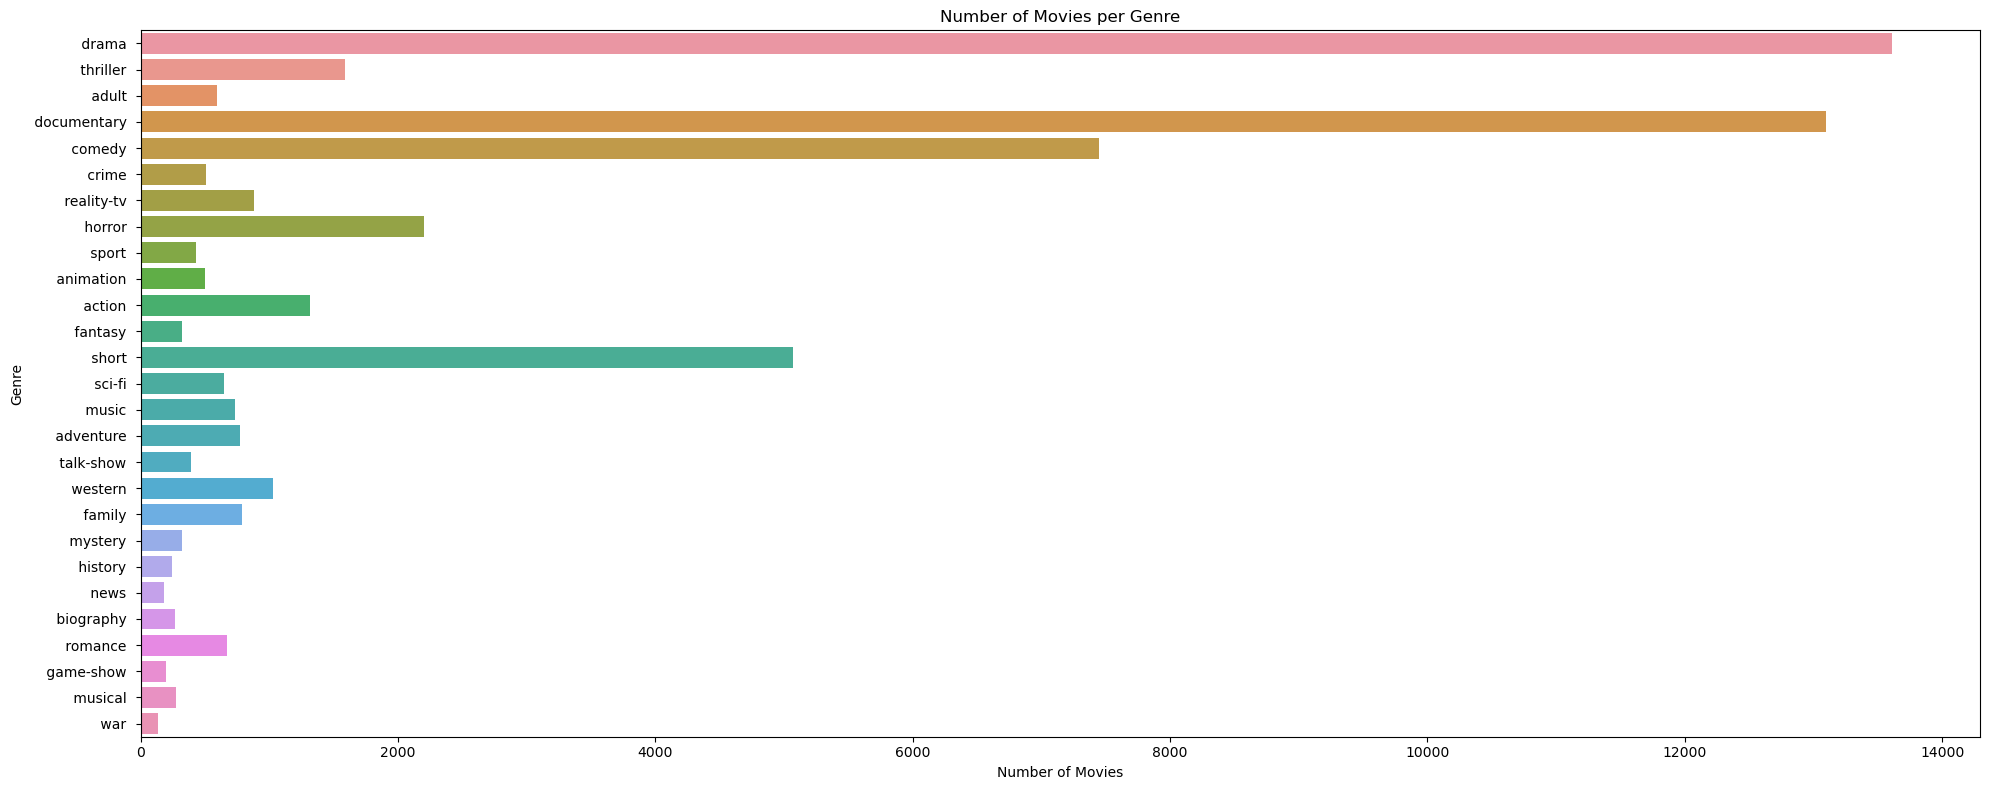

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'])
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

<Axes: ylabel='GENRE'>

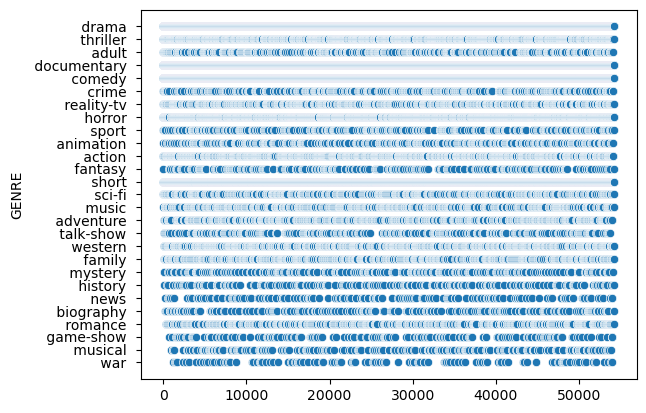

In [10]:
sns.scatterplot(train_data['GENRE'])

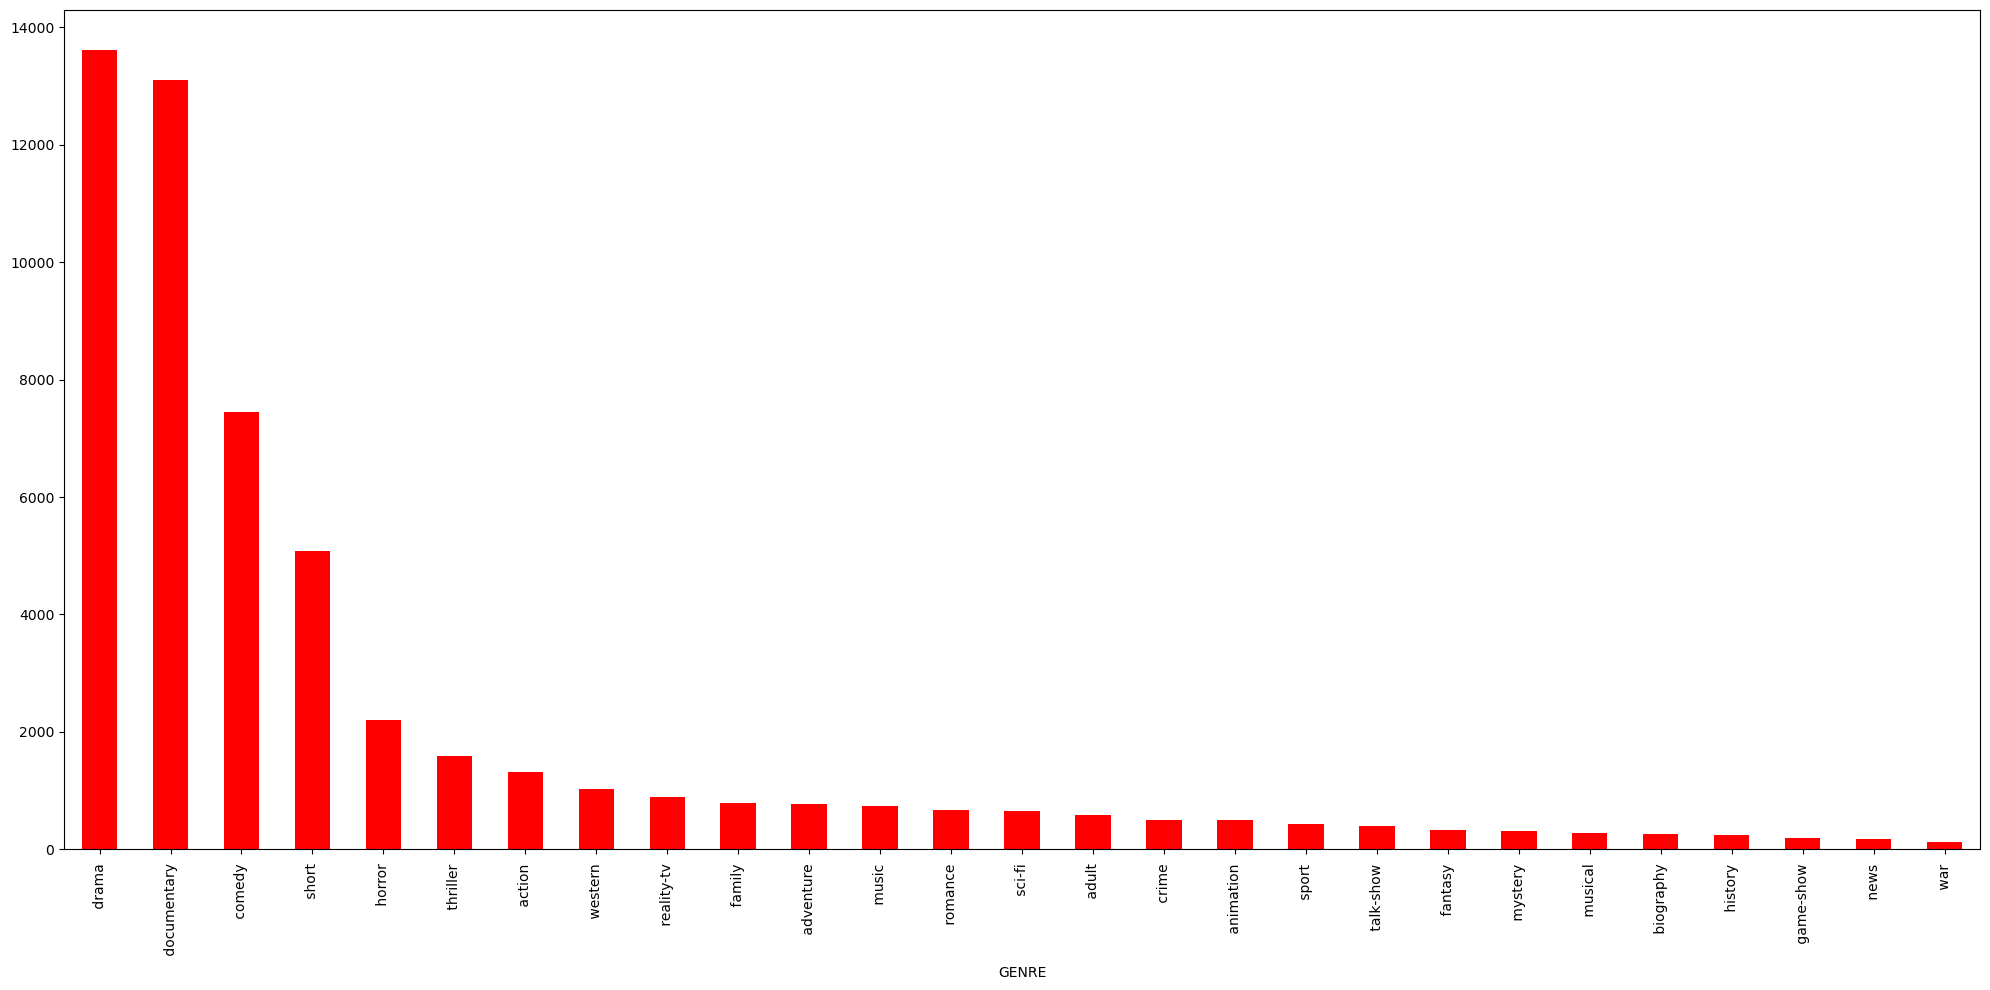

In [11]:
plt.figure(figsize=(20, 10)) 

genre = train_data["GENRE"].value_counts()

genre.plot(kind = "bar" , color = "red")

plt.tight_layout()

## Data Vectorization and encoding

In [12]:

from sklearn.model_selection import GridSearchCV


vector = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = vector.fit_transform(train_data['DESCRIPTION'])
x_test = vector.transform(test_data['GENRE'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])


## LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
ypre = model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, ypre))
print("Test Classification Report:\n", classification_report(y_test, ypre))

Test Accuracy: 0.5881180811808118
Test Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.26      0.35      1314
           1       0.62      0.20      0.31       590
           2       0.69      0.14      0.24       775
           3       0.57      0.02      0.05       498
           4       0.00      0.00      0.00       264
           5       0.55      0.59      0.57      7446
           6       0.40      0.02      0.04       505
           7       0.66      0.87      0.75     13096
           8       0.54      0.80      0.64     13612
           9       0.59      0.08      0.14       783
          10       0.62      0.02      0.03       322
          11       0.93      0.48      0.63       193
          12       0.00      0.00      0.00       243
          13       0.66      0.57      0.61      2204
          14       0.70      0.40      0.51       731
          15       0.67      0.01      0.01       276
          16      

c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
def predict_movie(description):
    t_v1 = vector.transform([description])
    pred_label = model.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products."

print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."
print(predict_movie(sample_descr_for_movie1))


 documentary 
 drama 
